In [15]:
import pandas as pd
import matplotlib.pyplot as pt
from pandas import DataFrame
from datetime import date

In [16]:
def read_csv() -> DataFrame:
    df = pd.read_csv('data.csv', header=None)
    df.columns = ['Date', 'Course']
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.dropna()
    df_mean = df["Course"].mean()
    df_median = df["Course"].median()
    df["Mean"] = df.apply(lambda x: (abs(x["Course"] - df_mean)), axis=1)
    df["Median"] = df.apply(lambda x: (abs(x["Course"] - df_median)), axis=1)
    df = df.sort_values(by="Date", ascending=True)
    return df

In [21]:
print(read_csv())
df = read_csv()

          Date   Course       Mean   Median
306 2022-11-12  60.2179  23.301656  27.4278
305 2022-11-15  60.3982  23.121356  27.2475
304 2022-11-16  60.3116  23.207956  27.3341
303 2022-11-17  60.3484  23.171156  27.2973
302 2022-11-18  60.3894  23.130156  27.2563
..         ...      ...        ...      ...
4   2024-02-06  91.2434   7.723844   3.5977
3   2024-02-07  90.6842   7.164644   3.0385
2   2024-02-08  91.1514   7.631844   3.5057
1   2024-02-09  91.2561   7.736544   3.6104
0   2024-02-10  90.8901   7.370544   3.2444

[307 rows x 4 columns]


In [42]:
def chek_info(df: DataFrame) -> pd.Series:
    return df["Course"].describe()

In [43]:
print(chek_info(df))

count    307.000000
mean      83.519556
std       11.012093
min       60.217900
25%       75.472850
50%       87.645700
75%       91.932750
max      101.359800
Name: Course, dtype: float64


In [22]:
def find_median_value(df: DataFrame, value: float) -> DataFrame:
    return df.query('Mean >= @value')

In [28]:
print(find_median_value(df, 10))

          Date   Course       Mean   Median
306 2022-11-12  60.2179  23.301656  27.4278
305 2022-11-15  60.3982  23.121356  27.2475
304 2022-11-16  60.3116  23.207956  27.3341
303 2022-11-17  60.3484  23.171156  27.2973
302 2022-11-18  60.3894  23.130156  27.2563
..         ...      ...        ...      ...
74  2023-10-20  97.3074  13.787844   9.6617
73  2023-10-21  95.9053  12.385744   8.2596
72  2023-10-24  94.7081  11.188544   7.0624
71  2023-10-25  93.5224  10.002844   5.8767
69  2023-10-27  93.5616  10.042044   5.9159

[120 rows x 4 columns]


In [29]:
def find_delta_time_value(df: DataFrame, first: date, second: date) -> DataFrame:
    return df.query('Date >= @first and Date<=@second')

In [30]:
print(find_delta_time_value(df, "2022-11-15", "2023-11-15"))

          Date   Course       Mean   Median
305 2022-11-15  60.3982  23.121356  27.2475
304 2022-11-16  60.3116  23.207956  27.3341
303 2022-11-17  60.3484  23.171156  27.2973
302 2022-11-18  60.3894  23.130156  27.2563
301 2022-11-19  60.3741  23.145456  27.2716
..         ...      ...        ...      ...
61  2023-11-09  92.1973   8.677744   4.5516
60  2023-11-10  91.9266   8.407044   4.2809
59  2023-11-11  92.0535   8.533944   4.4078
58  2023-11-14  92.1185   8.598944   4.4728
57  2023-11-15  91.2570   7.737444   3.6113

[249 rows x 4 columns]


In [31]:
def sort_month(df: DataFrame) -> pd.Series:
    return df.groupby(df.Date.dt.month)["Course"].mean()

In [32]:
print(sort_month(df))

Date
1     78.778131
2     78.302885
3     76.103586
4     80.995543
5     79.212595
6     83.319333
7     90.474048
8     95.285348
9     96.622259
10    97.122281
11    78.979397
12    78.038284
Name: Course, dtype: float64


In [35]:
def show_value_graph(df: pd.DataFrame) -> None:
    fig = pt.figure(figsize=(19, 5))
    pt.ylabel("Course")
    pt.xlabel("date")
    pt.title('Курс долара')
    pt.plot(df["Date"], df["Course"], color='blue',
            linestyle='-', linewidth=1)
    pt.show()

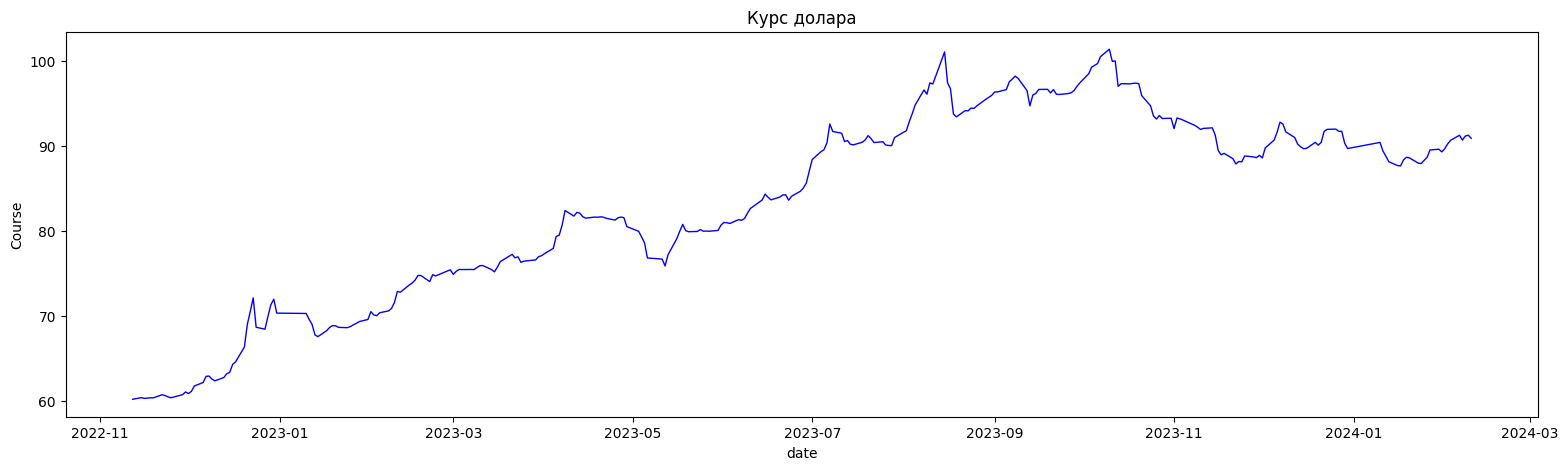

In [36]:
show_value_graph(df)

In [37]:
def course_per_month(df: DataFrame, date: date) -> None:
    p = df[(df["Date"].dt.year == date.year) &
           (df["Date"].dt.month == date.month)]
    p.plot(x="Date", y="Course", marker='o')
    pt.show()

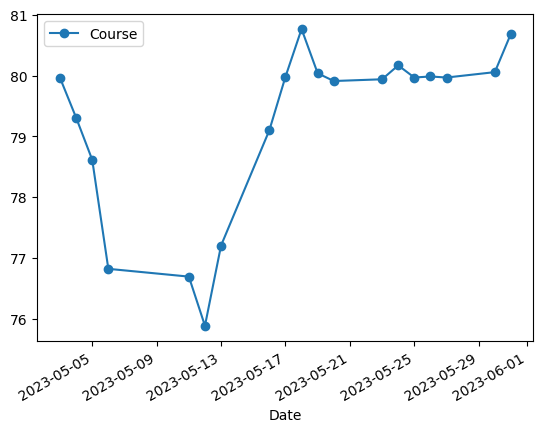

None


In [39]:
print(course_per_month(df, date(2023, 5, 1)))